<a href="https://colab.research.google.com/github/soohyunnie/Human-Age-Detection/blob/main/baseline_model_cnn_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this notebook, we are going to model our data with dense layers and convolutional layers.

This was done in google colab so the directory for the images and folders are different than the other notebook.

First, we are going to unzip our split folder which contains train, validation, and test folders.

In [2]:
!unzip "/content/drive/My Drive/split2.zip"

Streaming output truncated to the last 5000 lines.
  inflating: split2/validation/age_0_20_imgs/1_0_0_20161219202455708.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_0_20161219203657925.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_0_20161220220239129.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_0_20170103210905939.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_0_20170109191432590.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_0_20170109191725028.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_0_20170109192836519.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_0_20170109192948605.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_0_20170109193440113.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_0_20170109193511684.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_0_20170109193826712.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_0_20170109194400094.jpg  
  inflating: split2/validation/age_0_20_imgs/1_0_

## Function

In [11]:
def plot_loss_accuracy(result):
    '''
    Plots accuracy and loss

    Parameter: result of the model

    Returns: loss plot and accuracy plot
    '''

    history = result.history

    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [3]:
# Make variables for the three folder directories
train_dir = 'split2/train'
validation_dir = 'split2/validation'
test_dir = 'split2/test'

We need to create a image generator for the images. We augmented the images to transform the images.

In [4]:
data_gen_aug = ImageDataGenerator(rescale=1./255, 
                                        rotation_range=30, 
                                        horizontal_flip=True)
                                        
train_generator_aug = data_gen_aug.flow_from_directory(train_dir, target_size=(256, 256), batch_size=128)

validation_generator_aug = data_gen_aug.flow_from_directory(validation_dir, target_size=(256, 256), batch_size=128)

test_generator_aug = data_gen_aug.flow_from_directory(test_dir, target_size=(256, 256), batch_size=128)

Found 16000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
Found 3108 images belonging to 5 classes.


# Baseline Model

For our baseline model, we are going to use Dense Neural Networks with 5 layers including input and output layers. 

Before we start modeling, we need to reshape our images so it matches the shape for Dense Neural Networks.

In [5]:
train_imgs_aug, train_labels_aug = next(train_generator_aug)
validation_imgs_aug, validation_labels_aug = next(validation_generator_aug)
test_imgs_aug, test_labels_aug = next(test_generator_aug)

train_images_aug = train_imgs_aug.reshape(train_imgs_aug.shape[0], -1)
validation_images_aug = validation_imgs_aug.reshape(validation_imgs_aug.shape[0], -1)
test_images_aug = test_imgs_aug.reshape(test_imgs_aug.shape[0], -1)

print(train_images_aug.shape, validation_images_aug.shape, test_images_aug.shape)

(128, 196608) (128, 196608) (128, 196608)


In [8]:
baseline_model = models.Sequential()
baseline_model.add(Dense(128, activation='relu', input_shape=(196608,)))
baseline_model.add(Dense(64, activation='relu'))
baseline_model.add(Dense(32, activation='relu'))
baseline_model.add(Dense(16, activation='relu'))
baseline_model.add(Dense(5, activation='softmax'))

baseline_model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

baseline_result = baseline_model.fit(train_images_aug, train_labels_aug,
                                        epochs=20,
                                        batch_size=64,
                                        validation_data=(validation_images_aug, validation_labels_aug))

Epoch 1/20
2/2 [==============================] - 1s 269ms/step - loss: 24.2405 - accuracy: 0.1641 - val_loss: 46.6677 - val_accuracy: 0.2031
Epoch 2/20
2/2 [==============================] - 0s 82ms/step - loss: 22.7927 - accuracy: 0.2344 - val_loss: 4.3026 - val_accuracy: 0.1719
Epoch 3/20
2/2 [==============================] - 0s 71ms/step - loss: 3.5086 - accuracy: 0.2188 - val_loss: 9.6457 - val_accuracy: 0.2109
Epoch 4/20
2/2 [==============================] - 0s 73ms/step - loss: 7.3852 - accuracy: 0.2109 - val_loss: 4.0031 - val_accuracy: 0.1406
Epoch 5/20
2/2 [==============================] - 0s 71ms/step - loss: 4.2367 - accuracy: 0.2031 - val_loss: 13.5484 - val_accuracy: 0.2031
Epoch 6/20
2/2 [==============================] - 0s 78ms/step - loss: 10.8072 - accuracy: 0.2656 - val_loss: 2.7824 - val_accuracy: 0.2188
Epoch 7/20
2/2 [==============================] - 0s 74ms/step - loss: 4.4809 - accuracy: 0.2266 - val_loss: 3.8419 - val_accuracy: 0.2031
Epoch 8/20
2/2 [=====

In [15]:
models.save_model(baseline_model, '/content/drive/My Drive/baseline_model.h5')

In [9]:
result_train_aug = baseline_model.evaluate(train_images_aug, train_labels_aug)
result_validation_aug = baseline_model.evaluate(validation_images_aug, validation_labels_aug)

print(result_train_aug, result_validation_aug)

4/4 [==============================] - 0s 9ms/step - loss: 2.3453 - accuracy: 0.2109
[1.6678227186203003, 0.328125] [2.3453099727630615, 0.2109375]


The baseline model gave ~33% of accuracy on training data and ~21% on validation data. The model is definetely overfitting.

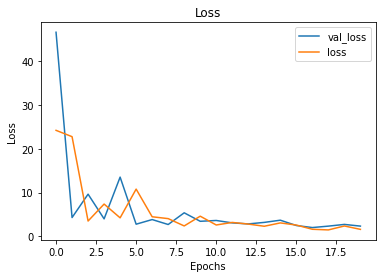

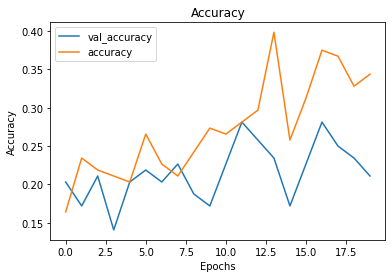

In [12]:
plot_loss_accuracy(baseline_result)

From the baseline model, you can see that the loss decreases as it goes through more epoch. Accuracy seems to spike frequently as it goes through more epoch.

In [13]:
result_test_aug = baseline_model.evaluate(test_images_aug, test_labels_aug)

print(result_test_aug)

4/4 [==============================] - 0s 9ms/step - loss: 2.7383 - accuracy: 0.2266
[2.7383439540863037, 0.2265625]


Let's look at the confusion matrix for the baseline model.

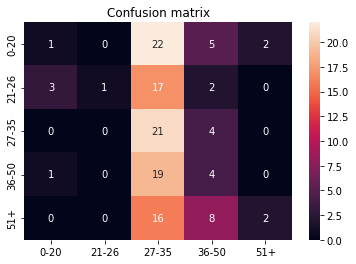

In [14]:
names = ['0-20', '21-26', '27-35', '36-50', '51+']

y_pred=baseline_model.predict(test_images_aug) 
y_pred=np.argmax(y_pred, axis=-1)

y_test=np.argmax(test_labels_aug, axis=-1)

CM = confusion_matrix(y_test, y_pred)

ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=names, 
           yticklabels=names, ax = ax,)
ax.set_title('Confusion matrix')
plt.show()

You can see that the model is prediting that the majority of the images are in age 27-35 (keep in mind that this model predicted only ~21% accurately).

# CNN

To increase the accuracy of the model, we are going to add convolutional layers.

In the first CNN model, we added 4 convolutional layers and 4 dense layers (including input and output layers).

In [ ]:
cnn_model = models.Sequential()

cnn_model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(512, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(5, activation='softmax'))

cnn_model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_result = cnn_model.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 128s 3s/step - loss: 1.6095 - accuracy: 0.2246 - val_loss: 1.6062 - val_accuracy: 0.2194
Epoch 2/15
40/40 [==============================] - 108s 3s/step - loss: 1.5963 - accuracy: 0.2504 - val_loss: 1.5285 - val_accuracy: 0.3116
Epoch 3/15
40/40 [==============================] - 108s 3s/step - loss: 1.4908 - accuracy: 0.3221 - val_loss: 1.4364 - val_accuracy: 0.3547
Epoch 4/15
40/40 [==============================] - 108s 3s/step - loss: 1.4137 - accuracy: 0.3848 - val_loss: 1.3835 - val_accuracy: 0.3894
Epoch 5/15
40/40 [==============================] - 108s 3s/step - loss: 1.3293 - accuracy: 0.4191 - val_loss: 1.3229 - val_accuracy: 0.4328
Epoch 6/15
40/40 [==============================] - 107s 3s/step - loss: 1.2623 - accuracy: 0.4543 - val_loss: 1.2672 - val_accuracy: 0.4531
Epoch 7/15
40/40 [==============================] - 107s 3s/step - loss: 1.2459 - accuracy: 0.4666 - val_loss: 1.2623 - val_accuracy: 0.4681
Epoch 8/15
40

In [ ]:
models.save_model(cnn_model, '/content/drive/My Drive/cnn_model1.h5')

In [ ]:
cnn_result_train_aug = cnn_model.evaluate(train_generator_aug)
cnn_result_validation_aug = cnn_model.evaluate(validation_generator_aug)

print(cnn_result_train_aug, cnn_result_validation_aug)

40/40 [==============================] - 63s 2s/step - loss: 1.1221 - accuracy: 0.5212
[1.0709037780761719, 0.5446875095367432] [1.1220674514770508, 0.5212000012397766]


Adding CNN layers increased the accuracy by 31% in validation.

Let's try adding more layers, adding drop layers, and changing the number of neurons in some layer.

In [ ]:
cnn_model2 = models.Sequential()

cnn_model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Dropout(0.25))
cnn_model2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Dropout(0.25))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(256, activation='relu'))
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dense(32, activation='relu'))
cnn_model2.add(Dense(16, activation='relu'))
cnn_model2.add(Dense(5, activation='softmax'))

cnn_model2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_result2 = cnn_model2.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 109s 3s/step - loss: 1.6065 - accuracy: 0.2156 - val_loss: 1.6022 - val_accuracy: 0.2125
Epoch 2/15
40/40 [==============================] - 107s 3s/step - loss: 1.6000 - accuracy: 0.2359 - val_loss: 1.5889 - val_accuracy: 0.2900
Epoch 3/15
40/40 [==============================] - 107s 3s/step - loss: 1.5582 - accuracy: 0.2996 - val_loss: 1.5220 - val_accuracy: 0.3178
Epoch 4/15
40/40 [==============================] - 106s 3s/step - loss: 1.4855 - accuracy: 0.3439 - val_loss: 1.4319 - val_accuracy: 0.3600
Epoch 5/15
40/40 [==============================] - 106s 3s/step - loss: 1.4047 - accuracy: 0.3686 - val_loss: 1.3665 - val_accuracy: 0.3997
Epoch 6/15
40/40 [==============================] - 107s 3s/step - loss: 1.3525 - accuracy: 0.4221 - val_loss: 1.2575 - val_accuracy: 0.4487
Epoch 7/15
40/40 [==============================] - 106s 3s/step - loss: 1.2631 - accuracy: 0.4566 - val_loss: 1.2558 - val_accuracy: 0.4650
Epoch 8/15
40

In [ ]:
models.save_model(cnn_model2, '/content/drive/My Drive/cnn_model2.h5')

In [ ]:
cnn_result_train_aug2 = cnn_model2.evaluate(train_generator_aug)
cnn_result_validation_aug2 = cnn_model2.evaluate(validation_generator_aug)

print(cnn_result_train_aug2, cnn_result_validation_aug2)

40/40 [==============================] - 63s 2s/step - loss: 1.0946 - accuracy: 0.5292
[1.0707972049713135, 0.5382500290870667] [1.0946311950683594, 0.52920001745224]


Adding more layers, adding drop layers, and changing the number of neurons increased the accuracy by 1% more than previous model.

Let's see if adding BatchNormalization() and regularization will increase the accuracy score.

In [ ]:
cnn_model3 = models.Sequential()

cnn_model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(MaxPooling2D((2, 2)))
cnn_model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(BatchNormalization())
cnn_model3.add(MaxPooling2D((2, 2)))
cnn_model3.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(MaxPooling2D((2, 2)))
cnn_model3.add(BatchNormalization())
cnn_model3.add(Dropout(0.25))
cnn_model3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(MaxPooling2D((2, 2)))
cnn_model3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(MaxPooling2D((2, 2)))
cnn_model3.add(BatchNormalization())
cnn_model3.add(Dropout(0.25))
cnn_model3.add(Flatten())
cnn_model3.add(Dense(256, activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(Dense(128, activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(BatchNormalization())
cnn_model3.add(Dense(32, activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(Dense(16, activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(Dense(5, activation='softmax'))

cnn_model3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_result3 = cnn_model3.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 110s 3s/step - loss: 11.6421 - accuracy: 0.3209 - val_loss: 9.8812 - val_accuracy: 0.1947
Epoch 2/15
40/40 [==============================] - 108s 3s/step - loss: 7.6637 - accuracy: 0.4152 - val_loss: 6.6119 - val_accuracy: 0.1859
Epoch 3/15
40/40 [==============================] - 107s 3s/step - loss: 4.9665 - accuracy: 0.4563 - val_loss: 5.3686 - val_accuracy: 0.1869
Epoch 4/15
40/40 [==============================] - 107s 3s/step - loss: 3.5038 - accuracy: 0.4863 - val_loss: 4.4402 - val_accuracy: 0.1863
Epoch 5/15
40/40 [==============================] - 107s 3s/step - loss: 2.7442 - accuracy: 0.4764 - val_loss: 3.0715 - val_accuracy: 0.1859
Epoch 6/15
40/40 [==============================] - 107s 3s/step - loss: 2.2688 - accuracy: 0.5033 - val_loss: 2.7731 - val_accuracy: 0.1950
Epoch 7/15
40/40 [==============================] - 107s 3s/step - loss: 1.9706 - accuracy: 0.5219 - val_loss: 3.0457 - val_accuracy: 0.1813
Epoch 8/15
4

In [ ]:
models.save_model(cnn_model3, '/content/drive/My Drive/cnn_model3.h5')

In [ ]:
cnn_result_train_aug3 = cnn_model3.evaluate(train_generator_aug)
cnn_result_validation_aug3 = cnn_model3.evaluate(validation_generator_aug)

print(cnn_result_train_aug3, cnn_result_validation_aug3)

40/40 [==============================] - 63s 2s/step - loss: 1.5240 - accuracy: 0.4684
[1.5131057500839233, 0.4830625057220459] [1.524017333984375, 0.4684000015258789]


Adding BatchNormalization and regularization made our model worst than before.

In another notebook called pretrained_model.ipynb, we will try adding pretrained model to increase the accuracy of the model.